In [1]:
# for basic operations
import numpy as np 
import pandas as pd 
import statsmodels.api as sm
# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

In [183]:
data = pd.read_csv('housePrices_train.csv')

In [3]:
data.shape

(1460, 81)

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
pd.set_option('display.max_columns', 82)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
data.Neighborhood

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
1455    Gilbert
1456     NWAmes
1457    Crawfor
1458      NAmes
1459    Edwards
Name: Neighborhood, Length: 1460, dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


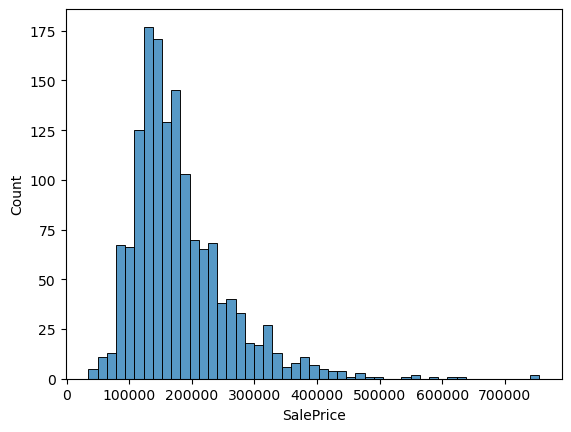

In [10]:
sns.histplot(data['SalePrice'])
plt.show()

In [11]:
data.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [12]:
print(data['SalePrice'].min())
print(data['SalePrice'].max())
print(data['SalePrice'].mean())
print(data['SalePrice'].median())
print(data['SalePrice'].mode())
print(data['SalePrice'].std())
print(data['SalePrice'].var())
print(data['SalePrice'].kurt())
print(data['SalePrice'].skew())

34900
755000
180921.19589041095
163000.0
0    140000
Name: SalePrice, dtype: int64
79442.50288288663
6311111264.297451
6.536281860064529
1.8828757597682129


In [13]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### SalePrice SampleMean

In [16]:
np.random.seed(23)
sampleprice = np.random.choice(a=data['SalePrice'],size=500)
sampleprice.mean()

181655.048

### SalePrice Population Mean

In [18]:
print(data['SalePrice'].mean())

180921.19589041095


### Neiborhood Analytics

In [20]:
data.Neighborhood.value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

### Comparing the Neigborhood Mean Sale Price with the entire Population SalesPrice using the z test

In [22]:
from statsmodels.stats.weightstats import ztest
zval , pval = ztest(x1 = data[data['Neighborhood']=='Edwards']['SalePrice'], value=data['SalePrice'].mean())
print(zval ,'   : ', pval)

-12.196987594087203    :  3.2253680352007412e-34


### There is significant difference

In [24]:
zval , pval = ztest(x1 = data[data['Neighborhood']=='OldTown']['SalePrice'], value=data['SalePrice'].mean())
print(zval ,'   : ', pval)

-10.639294263334575    :  1.9560526026260018e-26


### The difference between the sample mean and the population mean is highly significant

## Lets calculate the probability of getting a house at a certain Neighborhood given a certain amount of money

In [27]:
mean_ =data[data['Neighborhood']=='Edwards']['SalePrice'].mean()
stdev =data[data['Neighborhood']=='Edwards']['SalePrice'].std()
from scipy import stats
z_sc=(180000-mean_)/stdev
stats.norm.cdf(z_sc)

0.8846152543518949

## 88%

### Amount Interval

In [30]:
stats.t.interval(.90,len(data[data['Neighborhood']=='Edwards']['SalePrice']),mean_, scale=stdev)

(56483.2717735012, 199956.12822649878)

## Houses at Neigborhood Edwards cost between 199956.13 and 56483.27  USD

In [32]:
mean_ =data[data['Neighborhood']=='SawyerW']['SalePrice'].mean()
stdev =data[data['Neighborhood']=='SawyerW']['SalePrice'].std()
from scipy import stats
z_sc=(280000-mean_)/stdev
stats.norm.cdf(z_sc)

0.9534318553545458

### 95%

In [34]:
stats.t.interval(.90,len(data[data['Neighborhood']=='SawyerW']['SalePrice']),mean_, scale=stdev)

(93556.13083132516, 279555.4623890138)

#### Houses at Neigborhood SawyerW cost between $279555.46 and $ 93556.13

## What is the Maximum Price for houses at SawyerW Neighborhood 

In [37]:
data[data['Neighborhood']=='SawyerW']['SalePrice'].max()

320000

### Is there any significant difference in SalePrice between Edward and Sawyer Neighborhoods

## Independent (Unpaired) Two-Sample t-test

In [40]:
a=data[data['Neighborhood']=='SawyerW']['SalePrice']
b=data[data['Neighborhood']=='Edwards']['SalePrice']
stats.ttest_ind(a,b,axis=0,equal_var=True)

TtestResult(statistic=7.375410592264813, pvalue=8.880142338427138e-12, df=157.0)

#### p-value (8.88e-12) is much smaller than all these thresholds

Conclusion: There is a highly significant difference in sale prices between houses in SawyerW and Edwards neighborhoods.

### 1 sample t test

In [43]:
# 1 sample t test.
tscore, pvalue = stats.ttest_1samp(data[data['Neighborhood']=='CollgCr']['SalePrice'].sample(50), popmean=data['SalePrice'].mean())
print(tscore, ' : ',pvalue)

1.4925054739032373  :  0.14197778917993814


Since 0.00647 < 0.05, we reject the null hypothesis at a 5% significance level.


There is a statistically significant difference between the mean sale price in CollgCr and the overall mean.

## YearBuilt

<Axes: >

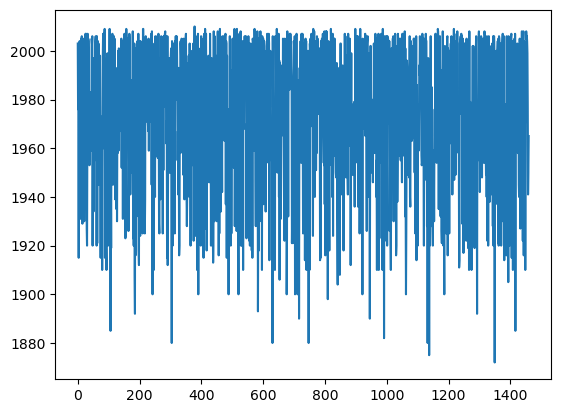

In [46]:
data['YearBuilt'].plot()

In [47]:
a= data[data['YearBuilt']<=1990]['SalePrice']
b=data[data['YearBuilt']>1990]['SalePrice']

In [48]:
t_stat, p_value = stats.ttest_ind(a,b,axis=0,equal_var=True)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -25.56467512748203, P-value: 2.081761246883554e-119


Using a significance level of 0.05, 0.01, or even 0.001:
p-value (2.08e-119) is much smaller than all these thresholds.
Therefore, reject the null hypothesis 

Conclusion: ✅ There is a highly significant difference in sale prices between houses built on/before 1990 and after 1990.
✅ The difference is not due to random chance—it is statistically real.

## Check Direction of Difference:

If t-statistic is positive, newer houses have higher average prices.


If t-statistic is negative, older houses have higher average prices.

In [52]:
print("Mean Sale Price Before 1990:", a.mean())
print("Mean Sale Price After 1990:", b.mean())

Mean Sale Price Before 1990: 147121.8707926167
Mean Sale Price After 1990: 238674.7736549165


Calculate Effect Size (Cohen's d):

                       
Measures how practically significant the difference is.



In [54]:
from numpy import std
cohen_d = (a.mean() - b.mean()) / std(data['SalePrice'])
print("Effect Size (Cohen's d):", cohen_d)


Effect Size (Cohen's d): -1.1528372016014925


In [55]:
(stats.shapiro(a), stats.shapiro(b)) #Normality 

(ShapiroResult(statistic=0.9023103145611915, pvalue=8.811952182648446e-24),
 ShapiroResult(statistic=0.8457403926582138, pvalue=1.6873829813832164e-22))


Your Results:

Both p-values are extremely small (way below 0.05).


Conclusion: The sale prices for both groups are NOT normally distributed.


In [57]:
(stats.levene(a, b)) #Equal Variance

LeveneResult(statistic=78.99960982601675, pvalue=1.7916393780228418e-18)

Since Levene’s test shows unequal variances, you should use Welch’s t-test instead (which does not assume equal variances):

In [59]:
from scipy import stats
t_stat, p_value = stats.ttest_ind(a, b, equal_var=False)
print(f"Welch’s T-Test p-value: {p_value}")

Welch’s T-Test p-value: 1.613405599816909e-86


# CHISQAUER TEST

### Test and see if there is any dependence between Sales Price and Land Contour 

### Create a Chisquare Function

In [142]:
def compute_freq_chi2(x,y):
    freqtab = pd.crosstab(x,y)
    print("Frequency table")
    print("============================")
    print(freqtab)
    print("============================")
    chi2, pval, dof, expected = stats.chi2_contingency(freqtab)
    print("ChiSquare test statistic: ",chi2)
    print("p-value: ",pval)
    return

In [144]:
price = pd.qcut(data['SalePrice'], 3, labels = ['High', 'Medium', 'Low'])
compute_freq_chi2(data.LandContour, price)

Frequency table
SalePrice    High  Medium  Low
LandContour                   
Bnk            32      20   11
HLS            10      12   28
Low             8      11   17
Lvl           437     447  427
ChiSquare test statistic:  26.252544346201447
p-value:  0.00019976918050008285


## ONE WAY ANOVA

### Test and see if there is an significance difference between the Sales Prices at different land Contours


 -------------------- describe ---------------------

LandContour            Bnk            HLS            Low            Lvl
count            63.000000      50.000000      36.000000    1311.000000
mean         143104.079365  231533.940000  203661.111111  180183.746758
std           49361.244074  101790.139741   83935.353620   78463.567918
min           52500.000000   82500.000000   39300.000000   34900.000000
25%          113000.000000  151750.000000  143000.000000  130000.000000
50%          139400.000000  222250.000000  190000.000000  162900.000000
75%          171250.000000  281347.250000  263750.000000  212000.000000
max          315000.000000  538000.000000  385000.000000  755000.000000


 -------------------- One way anova ---------------------



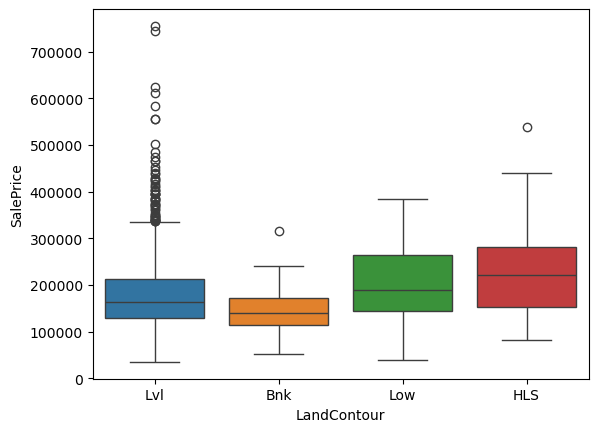

In [153]:
print('\n -------------------- describe ---------------------\n')
print(data.groupby('LandContour')['SalePrice'].describe().T)
    
    
#box_plot(category_cols,independent_col,dependent_col)
sns.boxplot(x='LandContour', y='SalePrice',hue='LandContour', data = data)
print('\n\n -------------------- One way anova ---------------------\n')

In [155]:
stats.f_oneway(data['SalePrice'][data['LandContour'] == 'Lvl'],data['SalePrice'][data['LandContour'] == 'Bnk'],data['SalePrice'][data['LandContour'] == 'Low'],data['SalePrice'][data['LandContour'] == 'HLS'])

F_onewayResult(statistic=12.850188333283924, pvalue=2.7422167521379096e-08)

In [157]:
stats.f_oneway(data['SalePrice'][data['LandContour'] == 'Lvl'].sample(35),data['SalePrice'][data['LandContour'] == 'Bnk'].sample(35),data['SalePrice'][data['LandContour'] == 'Low'].sample(35),data['SalePrice'][data['LandContour'] == 'HLS'].sample(35))

F_onewayResult(statistic=6.312162155790539, pvalue=0.0004852053294563307)

#### There are significant differences between the 3 means However we have to detect whuch exactly that are different using the Tukey HDS test

In [166]:
Level = data['SalePrice'][data['LandContour'] == 'Lvl'].sample(35)
Bank_hills = data['SalePrice'][data['LandContour'] == 'Bnk'].sample(35)
low = data['SalePrice'][data['LandContour'] == 'Low'].sample(35)
Hills = data['SalePrice'][data['LandContour'] == 'HLS'].sample(35)

In [168]:
stats.f_oneway(Level,Bank_hills,low,Hills)

F_onewayResult(statistic=4.798973379827543, pvalue=0.0032897949787485314)

## Tukey HSD TEST

In [173]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [175]:
F_stat, p_value = stats.f_oneway(Level, Bank_hills, low, Hills)
print(f"ANOVA F-statistic: {F_stat}, p-value: {p_value}")

# Check if we reject the null hypothesis
if p_value < 0.05:
    print("Significant difference found. Proceeding with Tukey's test.")
else:
    print("No significant difference found. Tukey test may not be necessary.")


ANOVA F-statistic: 4.798973379827543, p-value: 0.0032897949787485314
Significant difference found. Proceeding with Tukey's test.


#### Prepare Data for Tukey Test: You need to put your data into a long format with two columns: values and groups.

In [185]:
# Creating a DataFrame for Tukey's test
Tukey = pd.DataFrame({
    "values": np.concatenate([Level, Bank_hills, low, Hills]),
    "groups": (["Level"] * len(Level)) + 
              (["Bank_hills"] * len(Bank_hills)) + 
              (["low"] * len(low)) + 
              (["Hills"] * len(Hills))
})

In [187]:
Tukey.head()

,values,groups
0,181900,Level
1,162000,Level
2,207000,Level
3,170000,Level
4,227000,Level


In [191]:
Tukey['groups'].unique()

array(['Level', 'Bank_hills', 'low', 'Hills'], dtype=object)

### Perform Tukey's HSD test:

In [197]:
tukey = pairwise_tukeyhsd(Tukey['values'], Tukey['groups'], alpha=0.05)
print(tukey)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1   group2   meandiff  p-adj     lower       upper    reject
-------------------------------------------------------------------
Bank_hills  Hills  74715.2286 0.0036  19013.9017 130416.5555   True
Bank_hills  Level  64611.1714 0.0159   8909.8445 120312.4983   True
Bank_hills    low  50881.4571 0.0866  -4819.8698  106582.784  False
     Hills  Level -10104.0571 0.9651  -65805.384  45597.2698  False
     Hills    low -23833.7714 0.6822 -79535.0983  31867.5555  False
     Level    low -13729.7143 0.9185 -69431.0412  41971.6126  False
-------------------------------------------------------------------


## Boxplot for group comparisons

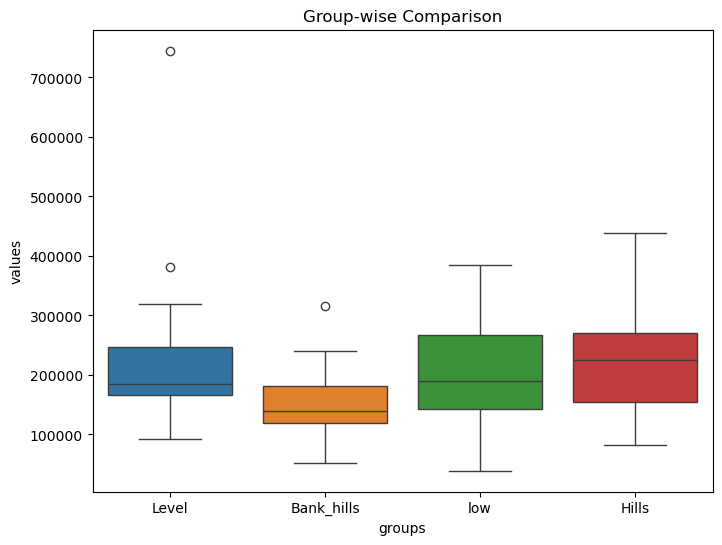

In [204]:
plt.figure(figsize=(8,6))
sns.boxplot(x='groups', y='values',hue='groups', data=Tukey)
plt.title("Group-wise Comparison")
plt.show()

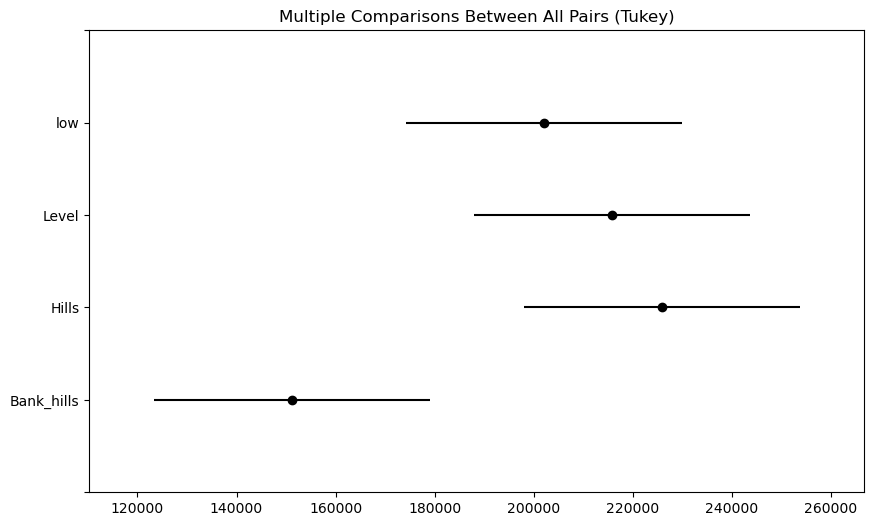

In [206]:
tukey.plot_simultaneous()
plt.show()